PR-new-logo-orizontal (1).svg
# **Analiza univariata si bivariata a datelor**


#### Overview:
+ Analiza univariată + vizualizări
    + distributția normala
    + Shapiro test
+ Analiză bivariată + vizualizări
+ Corelația Pearson
+ Standardizare și normalizare
+ PCA

În acest laborator vom parcurge metode de a obține intuiții despre setul/seturile de date cu care lucrăm.

#### De ce sunt importante analizele univariate și bivariate?
Folosind analiza univariată:
+ identificăm distribuția datelor
+ identificăm valori extreme (outliers)
+ pentru sanitizarea/curățarea datelor

Folosind analiza bivariată și corelațiile dintre variabile:
+ înțelegem tendințele si trendurile din date
+ identificăm relații între variabile


### Dataset

În acest laborator vom folosi datasetul [Kaggle Vehicle Dataset](https://drive.google.com/drive/folders/1eeDoK_Ts03W6iFZTdfLaMKHMzQc6q7TQ?usp=sharing). În folderul `data` se află `vehicle_dataset.csv` care conține informații despre vehiculele utilizate.

In [12]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Incarcam datele intr-un dataframe
car_df = pd.read_csv('./data/vehicle_dataset.csv')
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


## Analiza univariată


Este cea mai simplă formă de analiză a datelor în care datele analizate conțin o ```singură variabilă```. Deoarece este efectuată pe o singură variabilă, nu se ocupă de cauze sau relații. Scopul principal al analizei univariate este de a descrie datele și de a găsi caracteristicile principale ale acestora. Pana la a găsi caracteristicile datelor, vom face o clasificare a acestora in functie de tipul de date pe care îl conțin.

### Tipuri de date

+ **Date numerice** - sunt date care pot fi măsurate. Ex: temperatura, greutatea, înălțimea, etc.
+ **Date categorice** - sunt date care nu pot fi măsurate și au fost grupate in seturi de categorii mutual exclusive. Ex: culoarea, tipul, etc.
    + **Date ordinale / ordonate (ordonabile)** - sunt date categorice care pot fi ordonate. Ex: mărimea, gradul de satisfacție, etc.
    + **Date nominale / neordonate (neordonabile)** - sunt date categorice care nu pot fi ordonate. Ex: culoarea, tipul, etc.

<img src="./resources/data_clf.png" alt="" width="800"/>

In [14]:
# pentru a observa tipul de date din fiecare coloana folosim functia info()
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


### Ce putem folosi pentru a descrie o variabilă pentru un set de date?

Pentru **datele numerice** putem folosi urmatoarele statistici:
- **media** - suma tuturor valorilor împarțită la numărul de valori.
- **mediana** - valoarea din mijloc (din distribuție) a datelor ordonate crescător.
- **mode** - valoarea care apare cel mai des (in distribuția datelor) în setul de date.
- **deviația standard** - o măsură a cantității de variație sau dispersie a unui set de valori. O deviație standard scăzută indică faptul că valorile tind să fie apropiate de media (numită și valoare așteptată) a setului, în timp ce o abatere standard mare indică faptul că valorile sunt răspândite într-un interval mai larg.

Deviația standard are următoarea formulă:

$$\sigma = \sqrt{\frac{\sum_{i=1}^{n}(x_i - \mu)^2}{n}}$$

unde $\mu$ este media datelor.

Pentru **datele categorice** putem folosi următoarele statistici:
- **mode** - valoarea care apare cel mai des in setul de date.
- **frecvența absolută** - numărul de apariții al unei valori
- **frecvența relativă** - procentul de apariții al unei valori

In [15]:
# pentru datele numerice putem folosi functia describe()
car_df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [16]:
# pentru datele categorice putem folosi funcția describe(include=['O'])
car_df.describe(include=['O'])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,8128,8128,8128,8128,8128,7907,7907,7913,7906
unique,2058,4,3,2,5,393,121,322,441
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,129,4402,6766,7078,5289,225,1017,377,530


In [17]:
# pentru a afișa frecvența absolută a valorilor dintr-o coloană folosim funcția value_counts()
car_df["name"].value_counts()

name
Maruti Swift Dzire VDI              129
Maruti Alto 800 LXI                  82
Maruti Alto LXi                      71
BMW X4 M Sport X xDrive20d           62
Maruti Swift VDI                     61
                                   ... 
Maruti 800 DX BSII                    1
Ford Figo Aspire Titanium Diesel      1
Hyundai Verna CRDi 1.6 SX             1
Maruti Baleno Alpha Diesel            1
Tata New Safari Dicor VX 4X2          1
Name: count, Length: 2058, dtype: int64

In [18]:
# pentru frecvența relativă folosim funcția value_counts(normalize=True)
car_df["name"].value_counts(normalize=True)

name
Maruti Swift Dzire VDI              0.015871
Maruti Alto 800 LXI                 0.010089
Maruti Alto LXi                     0.008735
BMW X4 M Sport X xDrive20d          0.007628
Maruti Swift VDI                    0.007505
                                      ...   
Maruti 800 DX BSII                  0.000123
Ford Figo Aspire Titanium Diesel    0.000123
Hyundai Verna CRDi 1.6 SX           0.000123
Maruti Baleno Alpha Diesel          0.000123
Tata New Safari Dicor VX 4X2        0.000123
Name: proportion, Length: 2058, dtype: float64

## Distribuția normală

Distribuția normală este o distribuție de probabilitate continuă, care este caracterizată prin faptul ca are formă de clopot. Este o distributie simetrică, astfel ca media, mediana si moda sunt egale. Distribuția normală este folosita in multe domenii, deoarece este o distribuție care se apropie de realitatea datelor.

Formula distribuției normale este:

$$f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

unde:
- $\mu$ este media
- $\sigma$ este deviația standard

În figura de mai jos putem observa:
+ În mijloc distribuția normala
+ În stânga se află distribuția cu skew negativ
+ În dreapta distribuția cu skew pozitiv.

Skew este o masură a simetriei unei distribuții. O distribuție simetrică are skew = 0, iar o distribuție asimetrică are skew < 0 (skew negativ) sau skew > 0 (skew pozitiv). Formula este dată mai jos

$$SKEW = \frac{3 * (Mean - Median)}{Standard Deviation}$$

Skew pentru:
+ distribuție simetrica este 0
+ distribuție cu skew negativ este < 0
+ distribuție cu skew pozitiv este > 0


<img src="./resources/distr.png" alt="" width="800"/>

In [22]:
# pentru a calcula skewness-ul folosim funcția skew()
car_df.select_dtypes(include=[np.number]).skew()

year             -1.072293
selling_price     4.193533
km_driven        11.170910
seats             1.969914
dtype: float64

## De ce ne interesează distribuția normală?

Modelele de ML au o performanță mai bună atunci când datele sunt distribuite normal. Trebuie să vedem ce fel de date avem in setul nostru de date si sa testăm dacă sunt distribuite normal.

Trebuie să verificăm daca datele sun distribuite normal

+ prin vizualizare
+ prin testul de **Shapiro-Wilk**


### Ipoteza nulă (H0) si ipoteza alternativă (H1) pentru testul de Shapiro-Wilk

Ipoteza nulă (H0) este ipoteza care presupune că datele sunt distribuite normal.

Ipoteza alternativă (H1) presupune că datele NU sunt distribuite normal.


### Shapiro-Wilk test

Dacă valoarea p este mai mică decât nivelul alpha ales, atunci ipoteza nulă este respinsă și există dovezi că datele testate nu sunt distribuite normal.

Pe de altă parte, dacă valoarea p este mai mare decât nivelul alpha, atunci ipoteza nulă (că datele provin dintr-o populație distribuită normal) nu poate fi respinsă (de exemplu, pentru un nivel alfa de .05, un set de date cu o valoare p mai mică de .05 respinge ipoteza nulă conform căreia datele provin dintr-o populație distribuită normal).

În consecință, un set de date cu o valoare p mai mare decât valoarea alpha .05 nu reușește să respingă ipoteza nulă că datele provin dintr-o distribuție normală).


In [23]:
# shapiro test
# H0: distribuția este normală
# H1: distribuția nu este normală
# alpha = 0.05
# dacă p-value < alpha => respingem H0 => distribuția nu este normală
# dacă p-value > alpha => nu respingem H0 => distribuția este normală

# pentru a verifica daca distribuția este normală folosim funcția shapiro()
# funcția returnează statistic si p-value
# p-value = p
_, p = stats.shapiro(car_df["selling_price"][:500])

print("p-value = ", p)

p-value =  6.6974020022244004e-34


## Tipuri de grafice / vizualizări pentu analiză univariată

## Histograma

Histogramele reprezintă o metodă de vizualizare a distribuției numerice a datelor. Parametrul principal al acestui grafic este numărul de bin-uri folosite. Aceste **bin-uri** se referă la numărul de bar-uri care vor reprezenta distribuția.

Numărul de bin-uri ales decide dacă vizualizarea pe care o facem este useful sau useless. Nu există o metoda bine definită prin care să decidem ce număr de bin-uri folosim. Dacă numărul de bin-uri este prea mic, informația se va pierde. Dacă numărul de bin-uri este prea mare, putem ajunge la situația în care fiecare sample va fi încadrat într-un bin-ul său propriu, iar vizualizarea va deveni inutilă.


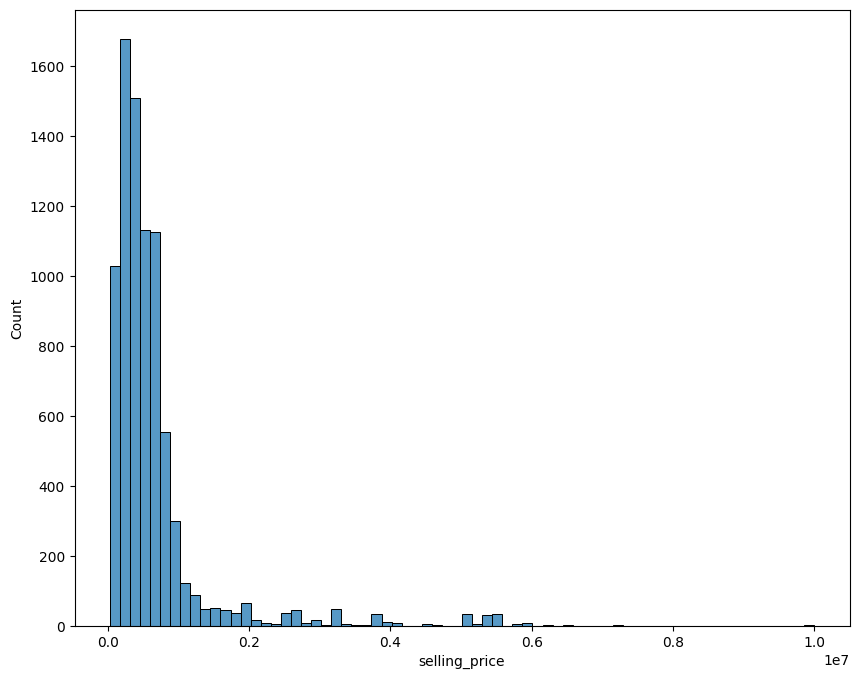

In [25]:
plt.figure(figsize=(10, 8))
sns.histplot(x='selling_price', data=car_df, bins=70)
plt.show()

### KDE (Kernel Density Estimation Plot) - Estimarea densității de probabilitate

KDE reprezintă o variantă de histogramă care este mai smooth (mai neteda) si mai bună pentru a vedea distribuția datelor.

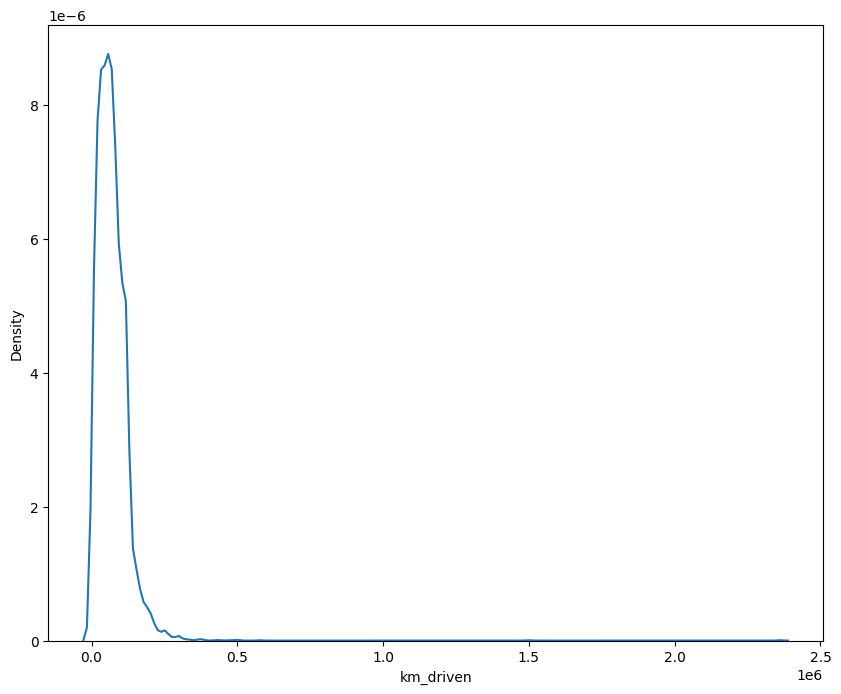

In [26]:
plt.figure(figsize=(10, 8))
sns.kdeplot(x='km_driven', data=car_df)
plt.show()

## Boxplot

Boxplot-urile reprezintă o metodă de vizualizare a datelor ce include 5 valori statistice:

+ Minimum
+ Prima quartilă
+ Mediana (A doua quartilă)
+ A treia quartilă
+ Maximum

**Quartilă (Quartile) = 25% din dataset**

Acest tip de vizualizare împarte datele în secțiuni de aproximativ 25%. Valorile extreme (outliers) sunt reprezentate prin puncte.

<img src="./resources/box.png" alt="" width="600"/>

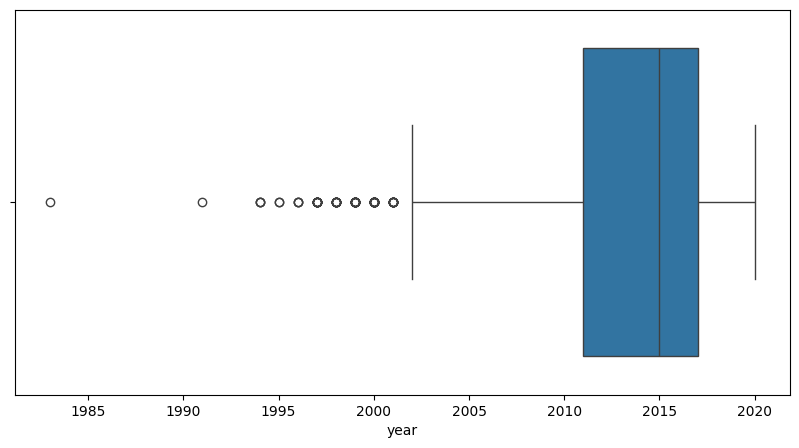

In [30]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='year', data=car_df)
plt.show()

## Violin plot (KDE + Boxplot)

Este o combinație între KDE si Boxplot. Include cele 5 valori statistice si arată distribuția datelor.

In celula următoare aveți o descriere a acestui tip de grafic.

<img src="./resources/violin.png" alt="" width="600"/>

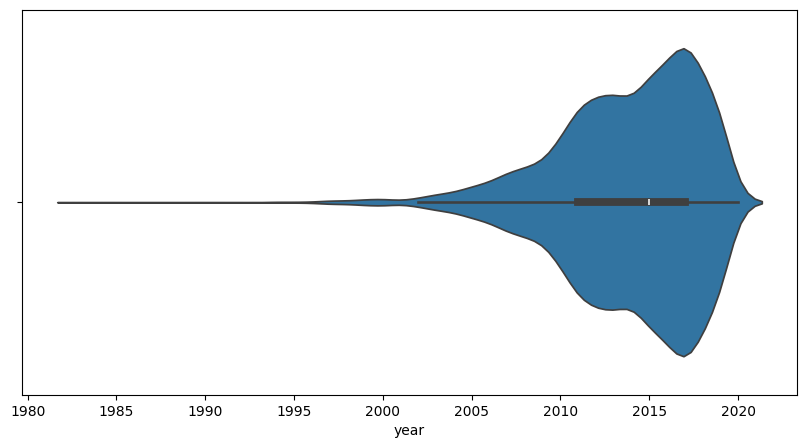

In [31]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='year', data=car_df)
plt.show()

## Analiză bivariată - Corelații

Analiza bivariată este folosită pentru studiul relației dintre două variabile. Analiza bivariată ajută la testarea ipotezei cauzalității și asocierii. Ajută la prezicerea valorii unei variabile care este dependentă de modificările unei alte variabile independente.

## Tipuri de grafice / vizualizări pentu analiza bivariată

### Scatter plot

Scopul Scatter Plot-urilor este de a vizualiza relatia dintre 2 variabile folosind puncte ca metoda de reprezentare. In urmatorul exemplu pe axa Ox avem numarul de kilometrii parcursi iar pe axa Oy avem pretul masinii.

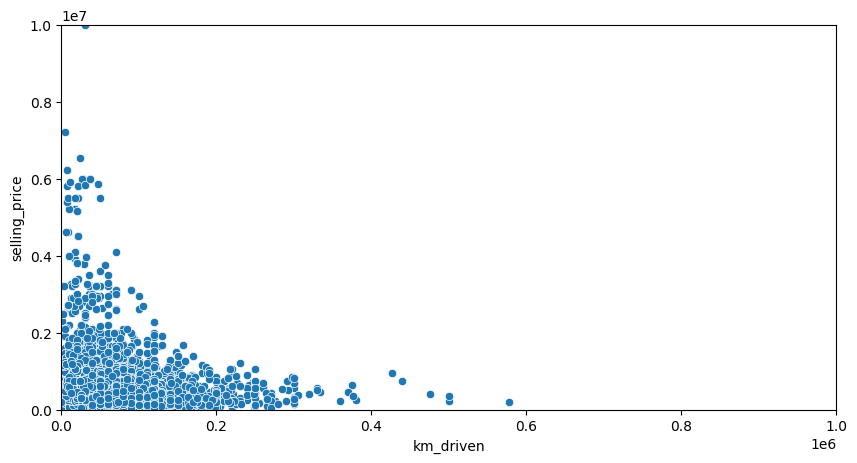

In [32]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='km_driven', y='selling_price', data=car_df)
plt.xlim(0, 1000000)
plt.ylim(0, 10000000)
plt.show()

### Lineplot

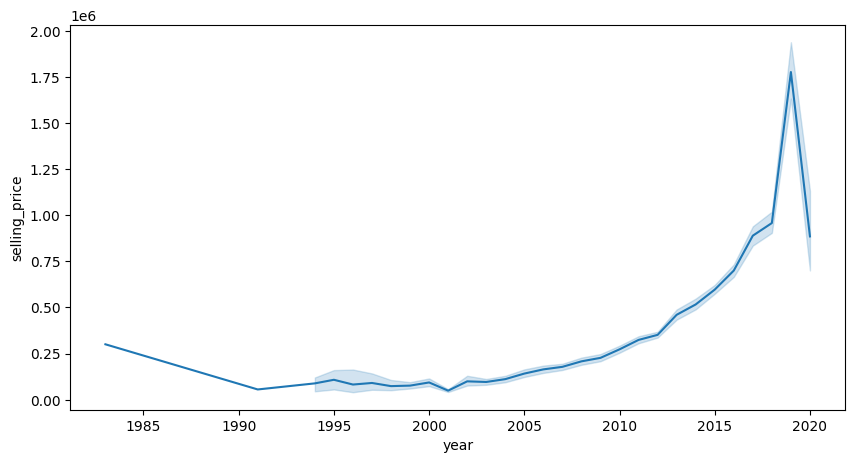

In [33]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='selling_price', data=car_df)
plt.show()

### Regplot

Regplot este un scatter plot cu o linie de regresie (linie de tendință).

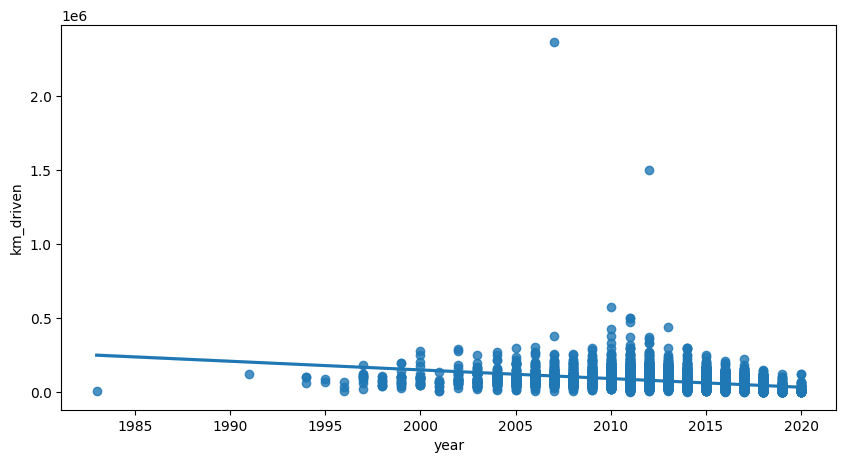

In [34]:
plt.figure(figsize=(10, 5))
sns.regplot(x='year', y='km_driven', data=car_df)
plt.show()

#### Corelația Pearson

Corelația Pearson r este cea mai utilizată statistică de corelație pentru a măsura gradul de relație dintre variabilele înrudite liniar. De exemplu, în piața de valori, dacă dorim să măsurăm modul în care două acțiuni sunt legate între ele, corelația Pearson r este utilizată pentru a măsura gradul de relație dintre cele două.

Presupuneri:
+ cele 2 variabile sunt normal distribuite
+ cele 2 variabile liniar corelate


<img src="./resources/r_.png" alt="Pearson_correlation_coefficient" width="600"/>

![](resources/r.png)

In [36]:
# calculăm corelația dintre variabilele numerice folosind funcția corr()
car_df.select_dtypes(include=[np.number]).corr(method='pearson')

,year,selling_price,km_driven,seats
year,1.000000,0.414092,-0.418006,-0.009144
selling_price,0.414092,1.000000,-0.225534,0.041358
km_driven,-0.418006,-0.225534,1.000000,0.227336
seats,-0.009144,0.041358,0.227336,1.000000


### Cauzalitatea corelațiilor

În cazul în care gasim o corelație între 2 variabile A și B există 5 posibilități:
+ A poate fi cauza lui B
+ B poate fi cauza lui A
+ A și B sunt corelate dar sunt cauzate de o altă variabilă C
+ poate exista o cauzalitate in lanț: A cauzează E, E cauzează B (A -> E -> B)

Câteva exemple:
+ Corelație negativă între păr și venit.
+ Corelație pozitivă între numărul de pompieri de la un incendiu și daunele materiale.
+ Corelație pozitivă între cantitatea de alcool și numărul de manele ascultate la un party.

#### !!! În cazul în care avem corelații puternice între variabilele din setul de date, vom elimina toate variabilele care sunt corelate exceptând una dintre ele deoarece variabilele corelate sunt redundante pentru modelele de ML.

Acest proces face parte din task-ul de **selectare a feature-urilor(feature selection)**.

### Heatmap-ul corelațiilor

În continuare vom vedea cum putem vizualiza corelațiile dintre variabilele numerice dintr-un dataset folosind heatmap.

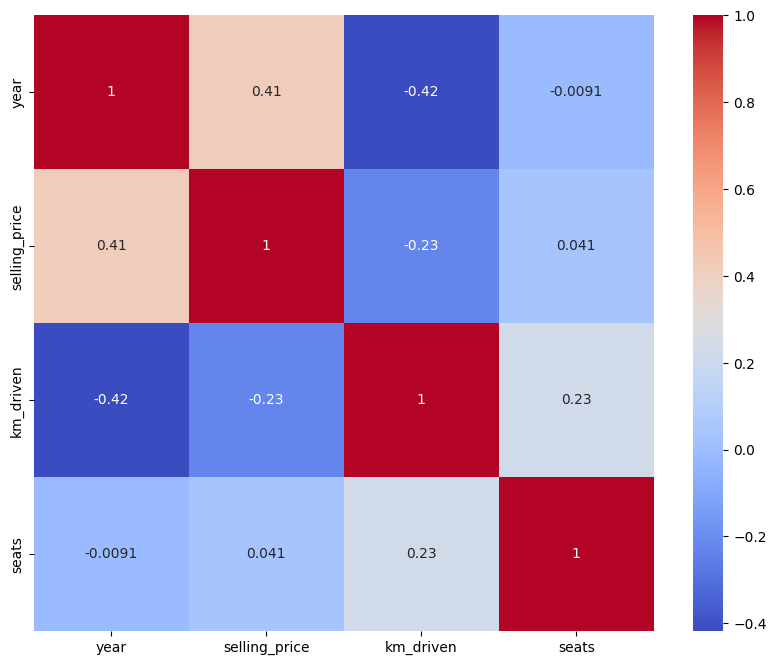

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(car_df.select_dtypes(include=[np.number]).corr(method='pearson'), annot=True, cmap='coolwarm')
plt.show()

### Pairplot

După calculul coeficienților de corelație, putem selecta variabilele de interes si să le vizualizăm folosind pairplot.

<Figure size 1000x800 with 0 Axes>

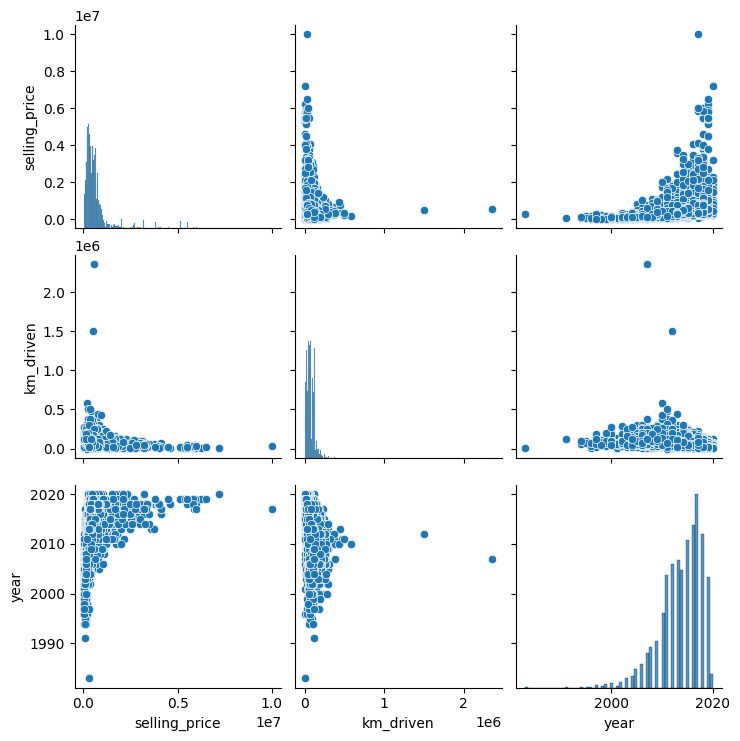

In [39]:
plt.figure(figsize=(10, 8))
sns.pairplot(car_df[['selling_price', 'km_driven', 'year']])
plt.show()

### Standardizare si Normalizare

Normalizarea este o tehnică de scalare în care valorile sunt deplasate și redimensionate astfel încât acestea ajung să varieze între 0 și 1. Este cunoscută și sub numele de scalare Min-Max.

$$x_{norm} = \frac{x - min(x)}{max(x) - min(x)}$$

Standardizarea este o tehnică de scalare în care valorile sunt centrate în jurul mediei cu o abatere standard unitară. Aceasta înseamnă că media atributului devine zero și distribuția rezultată are o abatere standard unitară.

$$x_{std} = \frac{x - mean(x)}{std(x)}$$

Rule of thumb:
+ Dacă datele sunt distribuite normal, atunci standardizarea este preferată
+ Dacă datele nu sunt distribuite normal, atunci normalizarea este preferată

De ce sunt utile aceste preprocesări ale datelor ?
+ Când veți antrena modele si veți folosi tehnici de optimizare precum gradient descent veți vedea că dacă feature-urile au range-uri foarte diferite, dimensiunea pasului de optimizare va varia in functie de range-urile feature-urilor. Dorim ca dimensiunea gradienților să fie similară pentru toate feature-urile pentru a ajunge rapid la parametrii optimi.  


<img src="./resources/grad_desc.png" alt="Scaling when using gradient descent" width="900"/>

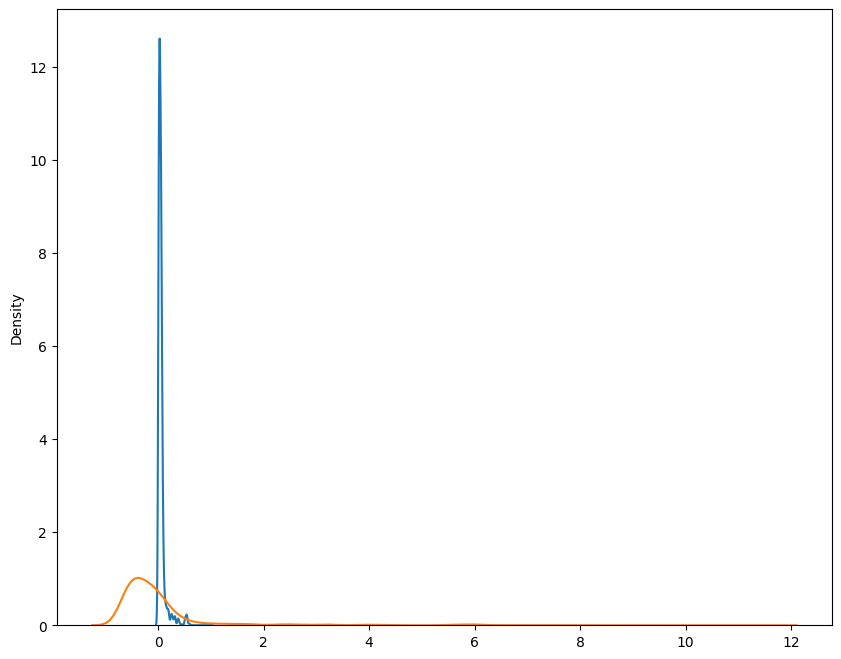

In [41]:
### Normalizarea datelor folosind MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# creăm un obiect de tip MinMaxScaler
scaler = MinMaxScaler()

# aplicăm funcția fit_transform() pe coloana selling_price
normed = scaler.fit_transform(car_df[['selling_price']])

### Standardizarea datelor folosind StandardScaler
from sklearn.preprocessing import StandardScaler

# creăm un obiect de tip StandardScaler
scaler = StandardScaler()

# aplicăm functia fit_transform() pe coloana selling_price
scaled = scaler.fit_transform(car_df[['selling_price']])


# Inainte si după
plt.figure(figsize=(10, 8))
sns.kdeplot(x=normed.flatten())
sns.kdeplot(x=scaled.flatten())
plt.show()



Am văzut cum putem vizualiza corelații folosind 2 variabile. Dar cum putem vizualiza corelațiile dintre mai multe variabile?

### PCA (Principal Component Analysis)

PCA este o metodă de reducere a dimensiunii a datelor. Aceasta transformă un set de date cu n dimensiuni intr-un set de date cu k dimensiuni (k < n) prin proiectarea datelor pe un subspațiu de dimensiune k. In acest laborator vom folosi PCA pentru a vizualiza datele <=> vom reduce dimensiunea datelor de la n la k = 2.

PCA este util pentru următoarele task-uri:
+ analizarea dataseturilor cu multe feature-uri
+ reducerea dimensiunii datelor
+ vizualizarea datelor
+ clustering

\* Și pentru PCA pașii de preprocesare a datelor (standardizare si normalizare) sunt benefici.

PCA presupune crearea unei ierarhii de componente principale (PC) care descriu datele (se bazează pe SVD). Componentele principale sunt axele principale ale datelor. Axele sunt ordonate în funcție de variația datelor pe acestea. Prima componentă principala are cea mai mare variație, a doua componentă principala are cea mai mare variație din cea ramasă dupa ce s-a scos variația de pe prima componentă, etc.



<img src="./resources/pca.jpg" alt="Pearson_correlation_coefficient" width="900"/>

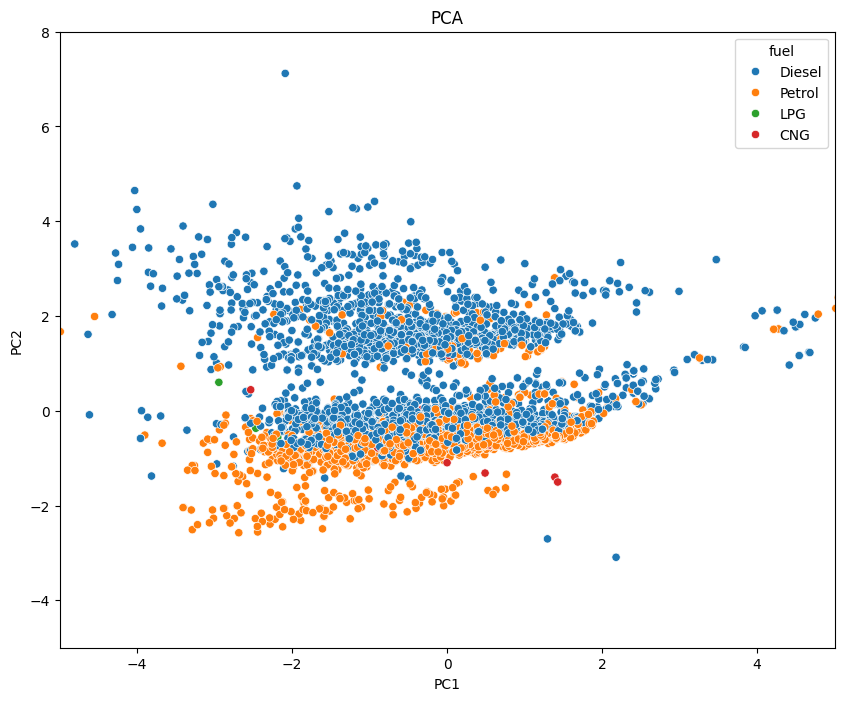

In [42]:
# exemplu de PCA pe datele din car_df
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

car_df.dropna(inplace=True)

# scale car_df
scaler = StandardScaler()
scaled_loan_df = scaler.fit_transform(car_df[['selling_price', 'km_driven', 'year', 'seats']])

# aplicăm PCA pe datele scalate
pca = PCA(n_components=2)
pca.fit(scaled_loan_df)

# transformăm datele scalate in date proiectate pe componentele principale
pca_car_df = pca.transform(scaled_loan_df)

# vizualizăm datele proiectate pe componentele principale
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_car_df[:, 0], y=pca_car_df[:, 1], hue=car_df['fuel'])
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim(-5, 5)
plt.ylim(-5, 8)
plt.show()



## Exerciții

Pentru exerciții vom folosi datasetul [Loan Predication](https://www.kaggle.com/datasets/ninzaami/loan-predication).

In [43]:
loan_df = pd.read_csv('./data/loan.csv')
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [44]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### 1. Efectuați analiză univariată pe dataset. Folosiți cele 3 tipuri de grafice. Pentru graficul cu histograma afișați media si mediana (hint: plt. axvline).  

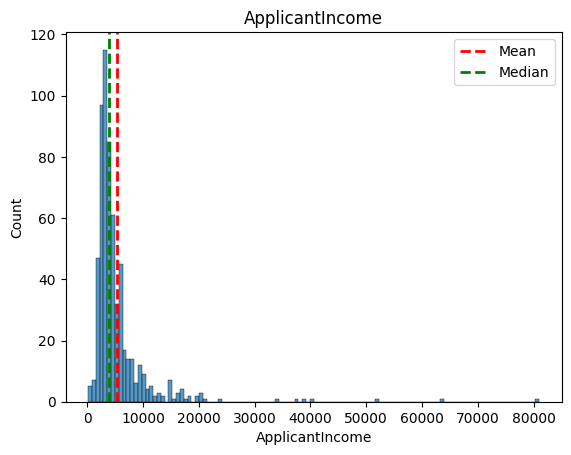

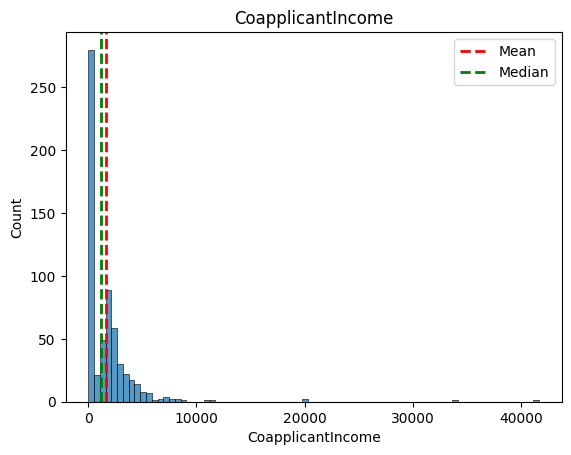

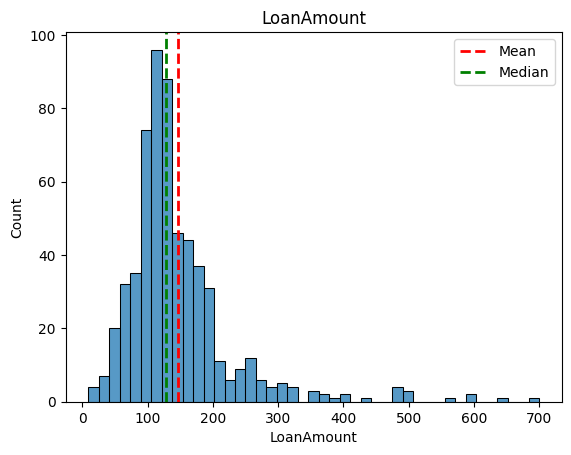

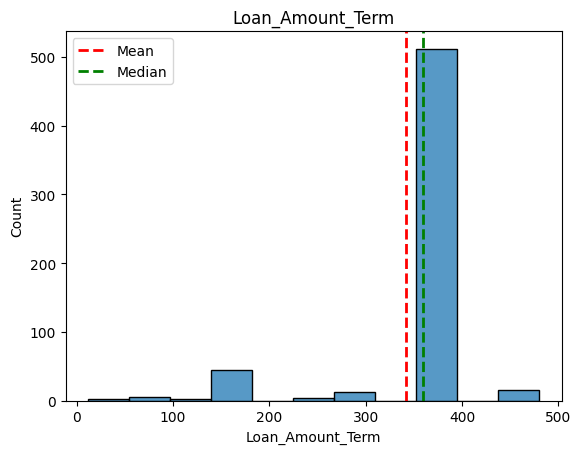

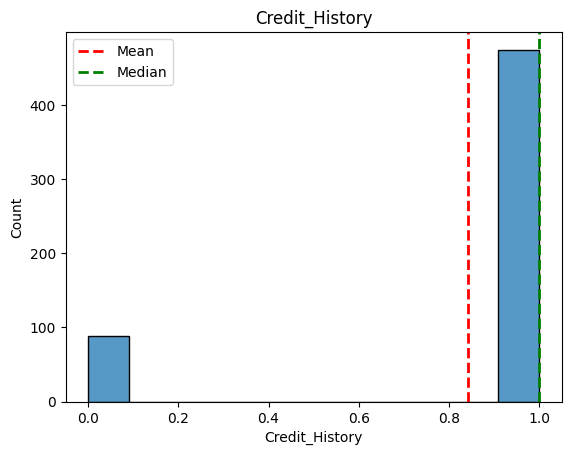

In [61]:
# Histograms
for col in loan_df.select_dtypes(include=[np.number]):
    sns.histplot(loan_df[col])
    plt.title(col)
    plt.axvline(loan_df[col].mean(), color='r', linestyle='dashed', linewidth=2)
    plt.axvline(loan_df[col].median(), color='g', linestyle='dashed', linewidth=2)
    plt.legend({'Mean':loan_df[col].mean(),'Median':loan_df[col].median()})
    plt.show()

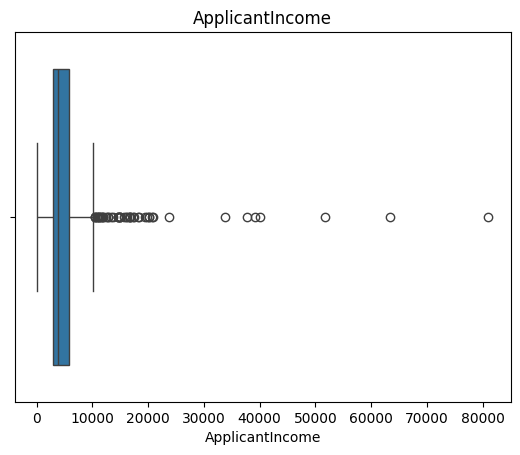

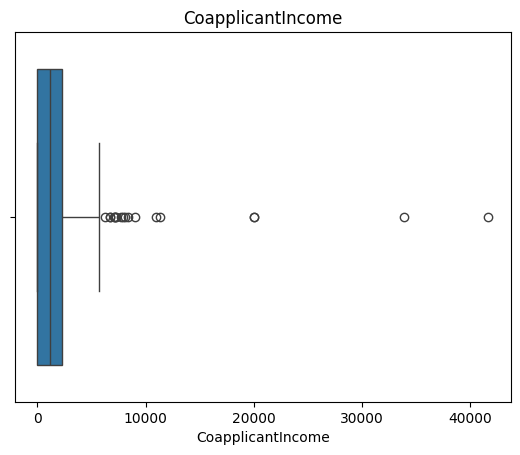

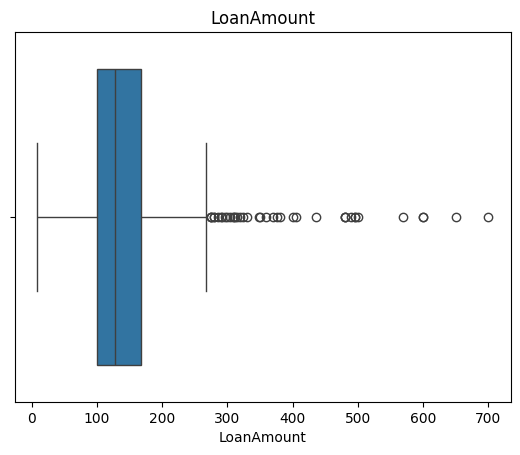

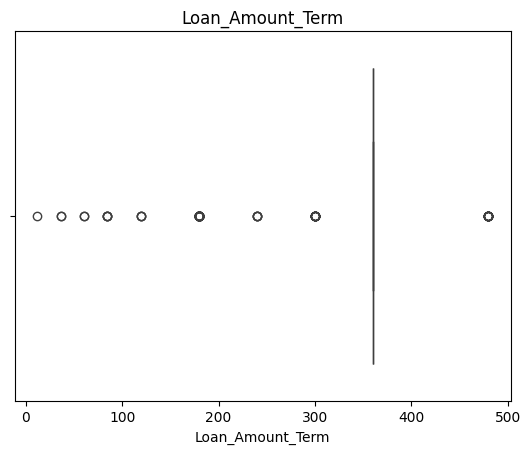

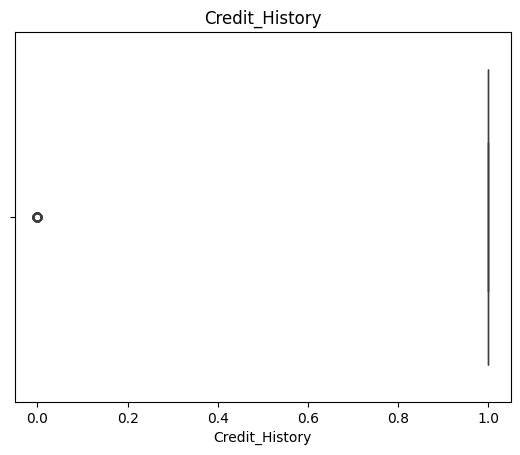

In [64]:
# Boxplots
for col in loan_df.select_dtypes(include=[np.number]):
    sns.boxplot(x=col, data=loan_df)
    plt.title(col)
    plt.show()

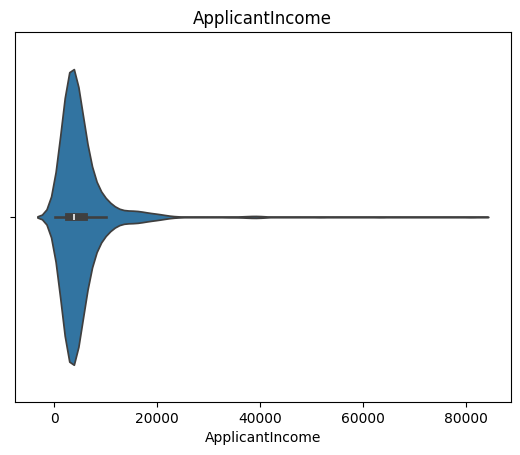

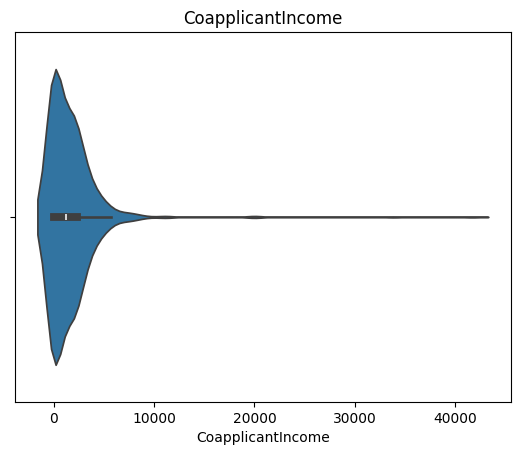

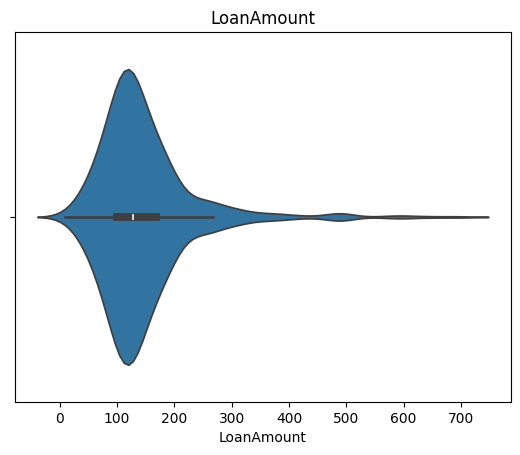

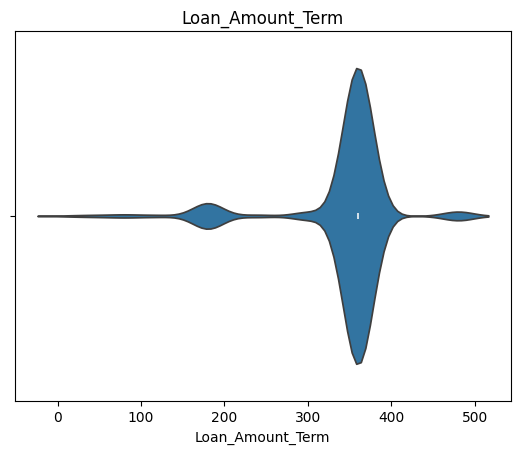

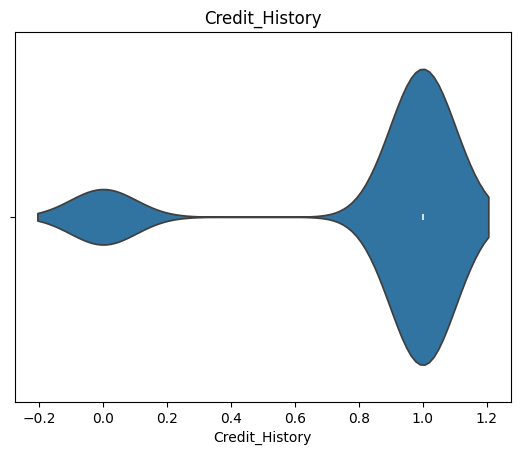

In [65]:
# Violin plots
for col in loan_df.select_dtypes(include=[np.number]):
    sns.violinplot(x=col, data=loan_df)
    plt.title(col)
    plt.show()

#### 2. Efectuați analiză bivariată pe dataset. Folosiți cele puțin 3 tipuri de grafice. Ce observații puteți face?

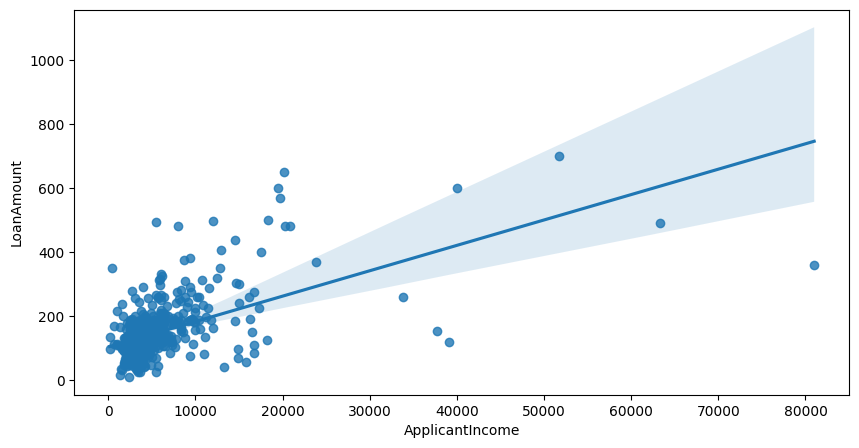

In [74]:
plt.figure(figsize=(10, 5))
sns.regplot(x='ApplicantIncome', y='LoanAmount', data=loan_df)
plt.show()

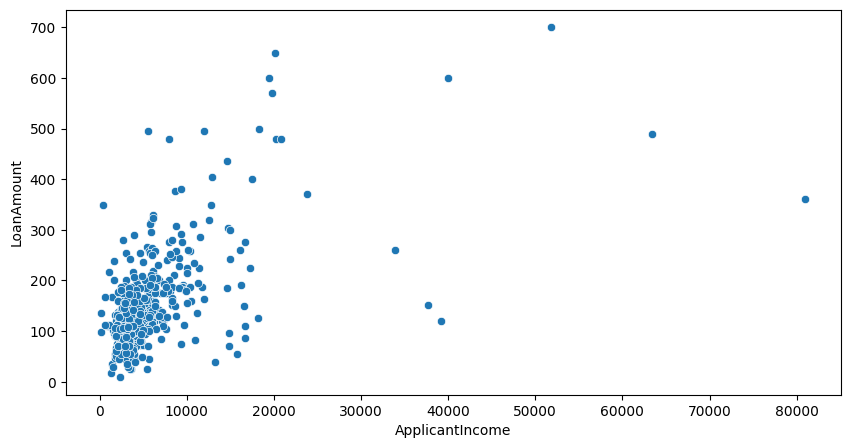

In [77]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=loan_df)
plt.show()

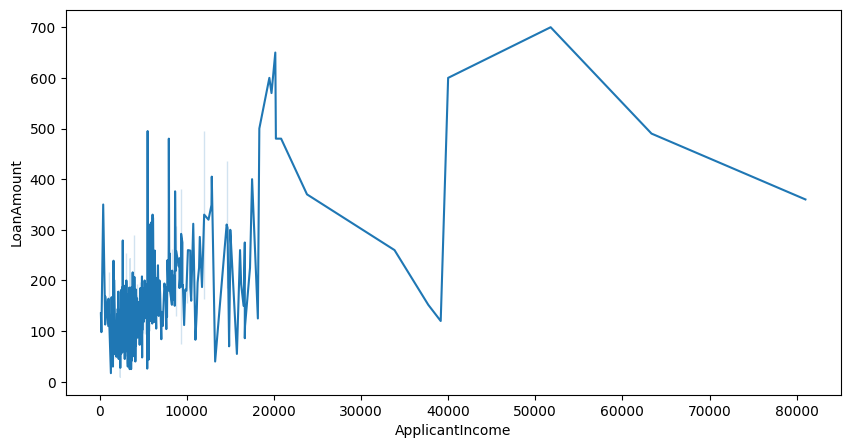

In [78]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='ApplicantIncome', y='LoanAmount', data=loan_df)
plt.show()

#### 3. Plotați heatmap-ul corelațiilor apoi pairplot. Ce observații puteti face?

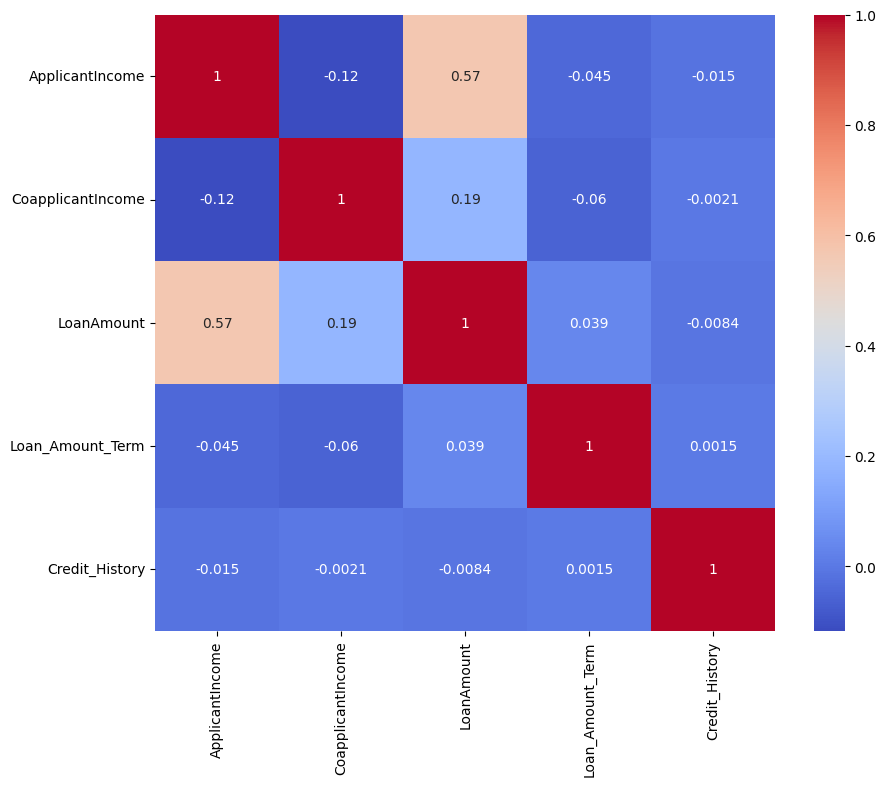

In [75]:
plt.figure(figsize=(10, 8))
sns.heatmap(loan_df.select_dtypes(include=[np.number]).corr(method='pearson'), annot=True, cmap='coolwarm')
plt.show()

<Figure size 1000x800 with 0 Axes>

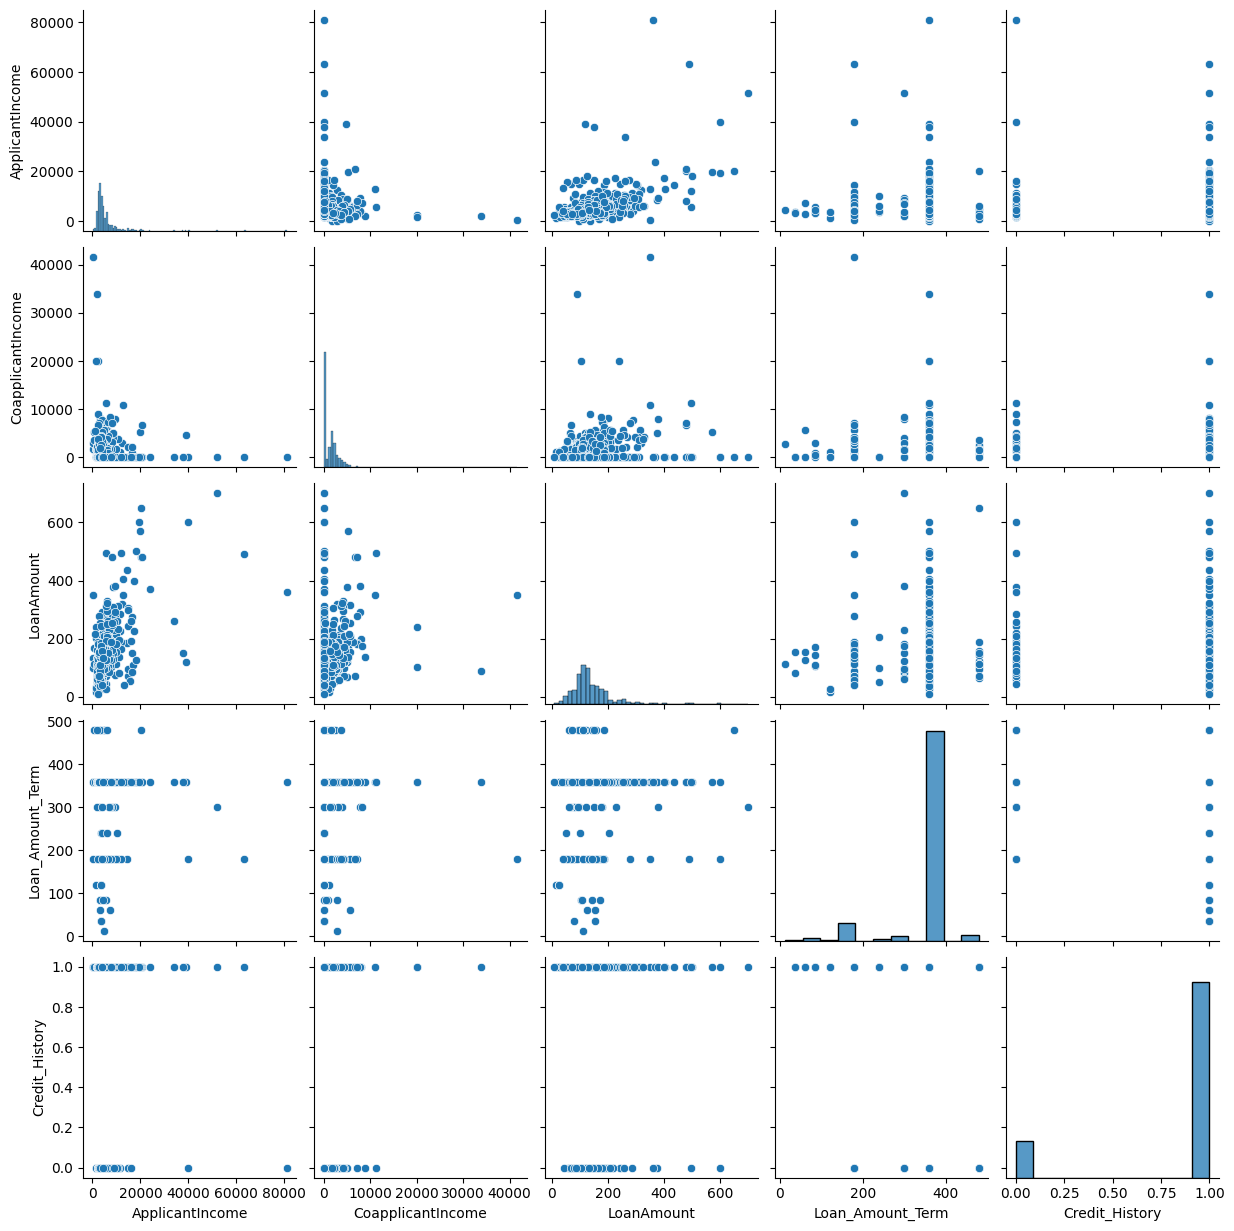

In [76]:
plt.figure(figsize=(10, 8))
sns.pairplot(loan_df.select_dtypes(include=[np.number]))
plt.show()

#### 4. Calculați coeficientul de corelație Pearson intre 2 coloane din dataset. Folosiți formula de mai sus si operațiile pe coloane din pandas. **NU folosiți functia de corelație din pandas.**

In [92]:
x = loan_df['CoapplicantIncome']
y = loan_df['LoanAmount']
pearson_corr = ((x - x.mean()) * (y - y.mean())).sum() / np.sqrt(((x - x.mean())**2).sum() * ((y - y.mean())**2).sum())
print("Pearson correlation: ", pearson_corr)
loan_df.select_dtypes(include=[np.number]).corr(method='pearson')

Pearson correlation:  0.18782839323334405


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


#### 5. Efectuați PCA pe dataset-ul standardizat. Plotați graficul cu componentele principale. Ce observații puteți face?

p-value for ApplicantIncome = 9.275407338717179e-35
p-value for CoapplicantIncome = 4.398121138770112e-33
p-value for LoanAmount = 1.7043654726793885e-23
p-value for Loan_Amount_Term = 3.0832052162694384e-35
p-value for Credit_History = 1.646305986230714e-36


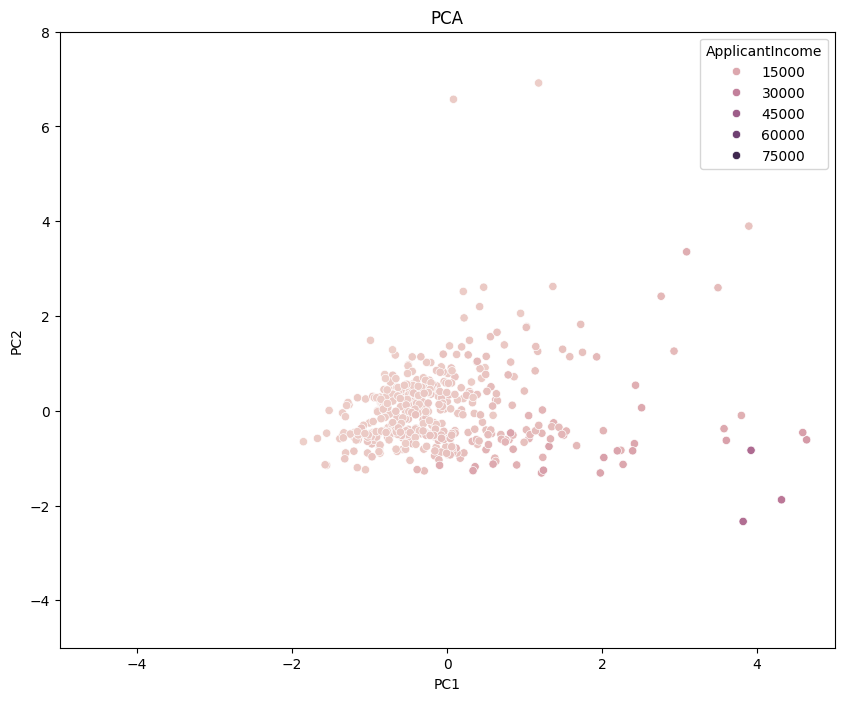

In [ ]:
for col in loan_df.select_dtypes(include=[np.number]):
    _, p = stats.shapiro(loan_df[col])
    print(f"p-value for {col} = {p}")

loan_df.dropna(inplace=True)

scaler = StandardScaler()
scaled_loan_df = scaler.fit_transform(loan_df.select_dtypes(include=[np.number]))

pca = PCA(n_components=2)
pca.fit(scaled_loan_df)

pca_car_df = pca.transform(scaled_loan_df)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_car_df[:, 0], y=pca_car_df[:, 1], hue=loan_df['ApplicantIncome'])
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim(-5, 5)
plt.ylim(-5, 8)
plt.show()